In [1]:
import ee
import geemap
from geemap import ml
from sklearn import ensemble
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializa la autenticación y la inicialización de Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-facuboladerasgee')

In [16]:
import os

def combine_csv_files(folder_path):
    # Lista para almacenar todos los DataFrames
    df_list = []
    
    # Recorrer todos los archivos en la carpeta
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            # Leer cada archivo CSV y agregarlo a la lista
            df = pd.read_csv(file_path)
            df_list.append(df)
    
    # Combinar todos los DataFrames en uno solo
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

# Ejemplo de uso
folder_path_2019 = 'C://Users//Facu//Downloads//EE_Malambique2'
combined_df = combine_csv_files(folder_path_2019)

In [3]:
combined_df = pd.read_csv(r"C:\Users\Facu\Downloads\Datos_RF_2020 (1).csv")

In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115150 entries, 0 to 115149
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   system:index       115150 non-null  int64  
 1   EVI                115150 non-null  float64
 2   FAPAR              115150 non-null  float64
 3   FVC                115150 non-null  float64
 4   HH_dB              115150 non-null  float64
 5   HH_dB_Contrast     115150 non-null  float64
 6   HH_dB_Correlation  115150 non-null  float64
 7   HH_dB_Entropy      115150 non-null  float64
 8   HH_dB_Inertia      115150 non-null  float64
 9   HH_div_HV          115150 non-null  float64
 10  HH_minus_HV        115150 non-null  float64
 11  HH_plus_HV         115150 non-null  float64
 12  HV_dB              115150 non-null  float64
 13  HV_dB_Contrast     115150 non-null  float64
 14  HV_dB_Correlation  115150 non-null  float64
 15  HV_dB_Entropy      115150 non-null  float64
 16  HV

In [5]:
combined_df['threshold'] = (combined_df['agbd_se'] / combined_df['agbd']) * 100
# combined_df = combined_df.loc[combined_df['Slope'] <= 25]

combined_df.describe()

,system:index,EVI,FAPAR,FVC,HH_dB,HH_dB_Contrast,HH_dB_Correlation,HH_dB_Entropy,HH_dB_Inertia,HH_div_HV,...,SR_B3,SR_B4,SR_B5,agbd,agbd_1,agbd_se,aspect,elevation,slope,threshold
count,115150.000000,115150.000000,115150.000000,115150.000000,115150.000000,115150.000000,115150.000000,115150.000000,115150.000000,115150.000000,...,115150.000000,115150.000000,115150.000000,115150.000000,115150.000000,115150.000000,115150.000000,115150.000000,115150.000000,115150.000000
mean,57574.500000,1.155558,0.143787,-0.081076,-14.654844,6.571020,0.679298,3.381437,6.571020,0.598333,...,10761.781298,14614.663595,16171.769049,25.435128,25.435128,4.295447,164.316424,667.768476,6.005869,91.080047
std,33241.086086,8.178678,0.053648,0.094119,4.452257,210.167329,0.097946,0.410908,210.167329,0.136036,...,975.718029,1300.537418,1994.443224,76.569517,76.569517,3.409289,104.826883,300.085301,7.287381,84.611756
min,0.000000,-1201.500000,-0.017895,-0.364728,-188.596340,0.117045,0.037797,0.539703,0.117045,-30.571370,...,7589.000000,8341.000000,7533.000000,0.709250,0.709250,2.981795,-0.000000,48.000000,0.000000,0.230792
25%,28787.250000,0.672756,0.107636,-0.144499,-17.326536,1.664545,0.615882,3.117829,1.664545,0.549837,...,10150.000000,13912.000000,15032.000000,2.240774,2.240774,2.996622,76.494076,501.000000,2.088609,22.291099
50%,57574.500000,0.919830,0.133118,-0.099793,-14.701019,2.293636,0.685374,3.388058,2.293636,0.609057,...,10807.000000,14592.000000,16332.000000,5.945318,5.945318,3.005378,160.876390,646.000000,3.424138,65.449459
75%,86361.750000,1.370188,0.168095,-0.038430,-11.951230,3.191364,0.749166,3.648157,3.191364,0.660487,...,11423.000000,15276.500000,17520.375000,17.681269,17.681269,4.194251,258.189953,742.000000,6.392450,138.696965
max,115149.000000,1296.282100,0.474234,0.498657,255.432070,30535.969000,0.943509,5.138958,30535.969000,1.085500,...,15669.500000,25932.000000,23788.000000,2873.883300,2873.883300,17.361689,359.096650,2863.000000,77.616760,424.342333


In [6]:
df_filtered = combined_df[combined_df['threshold'] <50]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47757 entries, 0 to 115149
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:index       47757 non-null  int64  
 1   EVI                47757 non-null  float64
 2   FAPAR              47757 non-null  float64
 3   FVC                47757 non-null  float64
 4   HH_dB              47757 non-null  float64
 5   HH_dB_Contrast     47757 non-null  float64
 6   HH_dB_Correlation  47757 non-null  float64
 7   HH_dB_Entropy      47757 non-null  float64
 8   HH_dB_Inertia      47757 non-null  float64
 9   HH_div_HV          47757 non-null  float64
 10  HH_minus_HV        47757 non-null  float64
 11  HH_plus_HV         47757 non-null  float64
 12  HV_dB              47757 non-null  float64
 13  HV_dB_Contrast     47757 non-null  float64
 14  HV_dB_Correlation  47757 non-null  float64
 15  HV_dB_Entropy      47757 non-null  float64
 16  HV_dB_Inertia      47757 n

In [7]:
def remove_outliers(df, column_name):

    mean = df[column_name].mean()
    std_dev = df[column_name].std()    
    threshold = 2 * std_dev    
    condition = (df[column_name] >= (mean - threshold)) & (df[column_name] <= (mean + threshold))    
    df_filtered = df[condition]
    
    return df_filtered


df_filtered_remove = remove_outliers(df_filtered, "agbd")
df_filtered_remove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46630 entries, 0 to 115149
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:index       46630 non-null  int64  
 1   EVI                46630 non-null  float64
 2   FAPAR              46630 non-null  float64
 3   FVC                46630 non-null  float64
 4   HH_dB              46630 non-null  float64
 5   HH_dB_Contrast     46630 non-null  float64
 6   HH_dB_Correlation  46630 non-null  float64
 7   HH_dB_Entropy      46630 non-null  float64
 8   HH_dB_Inertia      46630 non-null  float64
 9   HH_div_HV          46630 non-null  float64
 10  HH_minus_HV        46630 non-null  float64
 11  HH_plus_HV         46630 non-null  float64
 12  HV_dB              46630 non-null  float64
 13  HV_dB_Contrast     46630 non-null  float64
 14  HV_dB_Correlation  46630 non-null  float64
 15  HV_dB_Entropy      46630 non-null  float64
 16  HV_dB_Inertia      46630 n

In [8]:
df_nuevo = df_filtered_remove[df_filtered_remove['agbd'] <= 550]
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46630 entries, 0 to 115149
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:index       46630 non-null  int64  
 1   EVI                46630 non-null  float64
 2   FAPAR              46630 non-null  float64
 3   FVC                46630 non-null  float64
 4   HH_dB              46630 non-null  float64
 5   HH_dB_Contrast     46630 non-null  float64
 6   HH_dB_Correlation  46630 non-null  float64
 7   HH_dB_Entropy      46630 non-null  float64
 8   HH_dB_Inertia      46630 non-null  float64
 9   HH_div_HV          46630 non-null  float64
 10  HH_minus_HV        46630 non-null  float64
 11  HH_plus_HV         46630 non-null  float64
 12  HV_dB              46630 non-null  float64
 13  HV_dB_Contrast     46630 non-null  float64
 14  HV_dB_Correlation  46630 non-null  float64
 15  HV_dB_Entropy      46630 non-null  float64
 16  HV_dB_Inertia      46630 n

In [9]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

columns_to_drop = ['.geo','system:index','agbd_1', 'threshold', 'agbd_se']
df_modified = drop_columns(df_nuevo, columns_to_drop)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46630 entries, 0 to 115149
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVI                46630 non-null  float64
 1   FAPAR              46630 non-null  float64
 2   FVC                46630 non-null  float64
 3   HH_dB              46630 non-null  float64
 4   HH_dB_Contrast     46630 non-null  float64
 5   HH_dB_Correlation  46630 non-null  float64
 6   HH_dB_Entropy      46630 non-null  float64
 7   HH_dB_Inertia      46630 non-null  float64
 8   HH_div_HV          46630 non-null  float64
 9   HH_minus_HV        46630 non-null  float64
 10  HH_plus_HV         46630 non-null  float64
 11  HV_dB              46630 non-null  float64
 12  HV_dB_Contrast     46630 non-null  float64
 13  HV_dB_Correlation  46630 non-null  float64
 14  HV_dB_Entropy      46630 non-null  float64
 15  HV_dB_Inertia      46630 non-null  float64
 16  LAI                46630 n

In [29]:
features = [col for col in df_modified.columns if col not in ['.geo', 'system:index']]
print(features)

['EVI', 'FAPAR', 'FVC', 'HH_dB', 'HH_dB_Contrast', 'HH_dB_Correlation', 'HH_dB_Entropy', 'HH_dB_Inertia', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'HV_dB_Contrast', 'HV_dB_Correlation', 'HV_dB_Entropy', 'HV_dB_Inertia', 'LAI', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'agbd', 'aspect', 'elevation', 'slope']


In [62]:
feature_names = ['EVI', 'HH_dB', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'agbd', 'aspect', 'elevation', 'slope']

optico =['EVI', 'FAPAR', 'FVC', 'LAI', 'MNDWI', 'NDBI', 'NDVI', 'SAVI', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'agbd', 'aspect', 'elevation', 'slope']

radar = ['HH_dB', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'RVI_palsar', 'agbd', 'aspect', 'elevation', 'slope']


# # # feature_names_s2_palsar =  ['agbd','B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'HH', 'HH_HV_div_2', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'elevation', 'slope']
# feature_names_reduced =  ['agbd','NDBI','MNDWI','HV_dB','SR_B4','SR_B3','elevation','slope','EVI','HV_dB_Entropy','HV_dB_Correlation','SR_B2','HH_dB_Correlation','SR_B1','aspect']


df_reduce = df_modified[feature_names]

In [63]:
y = df_reduce['agbd']
X = df_reduce.drop(columns=['agbd'])

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46630 entries, 0 to 115149
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EVI          46630 non-null  float64
 1   HH_dB        46630 non-null  float64
 2   HH_div_HV    46630 non-null  float64
 3   HH_minus_HV  46630 non-null  float64
 4   HH_plus_HV   46630 non-null  float64
 5   HV_dB        46630 non-null  float64
 6   MNDWI        46630 non-null  float64
 7   NDBI         46630 non-null  float64
 8   NDVI         46630 non-null  float64
 9   RVI_palsar   46630 non-null  float64
 10  SAVI         46630 non-null  float64
 11  SR_B1        46630 non-null  float64
 12  SR_B2        46630 non-null  float64
 13  SR_B3        46630 non-null  float64
 14  SR_B4        46630 non-null  float64
 15  SR_B5        46630 non-null  float64
 16  aspect       46630 non-null  float64
 17  elevation    46630 non-null  float64
 18  slope        46630 non-null  float64
dtypes: float

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [42]:
import numpy as np
rf = RandomForestRegressor(random_state=42)

# Definir el grid de parámetros para buscar
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],    
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = best_rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Root Mean Squared Error: 38.33047503237241
R^2 Score: 0.6275590168251983


In [75]:
import numpy as np
rf = RandomForestRegressor(bootstrap= True, max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50, random_state=42) 

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 37.11227962374552
R^2 Score: 0.459377998639635


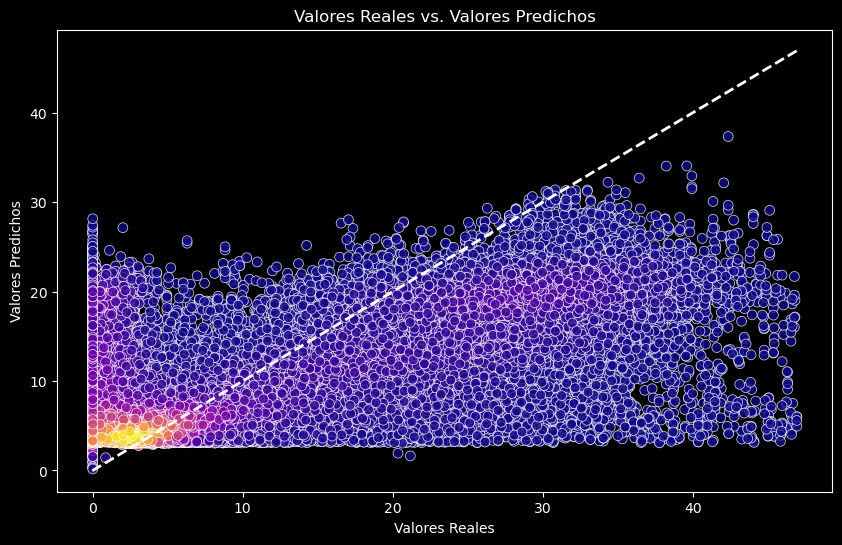

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calcular la densidad de puntos
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# Crear un gráfico de dispersión con color basado en la densidad de puntos
plt.figure(figsize=(10, 6), facecolor='black')
scatter = plt.scatter(y_test, y_pred, c=z, s=50, cmap='plasma', edgecolor='white', alpha=0.8, linewidth=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2)  # Línea de referencia en blanco
plt.xlabel('Valores Reales', color='white')
plt.ylabel('Valores Predichos', color='white')
plt.title('Valores Reales vs. Valores Predichos', color='white')

# Cambiar el color de los ejes y las etiquetas de los ticks
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Cambiar el color del fondo del gráfico
plt.gca().set_facecolor('black')
plt.savefig('real_vs_predicho2.png', facecolor='black')

plt.show()

        Feature  Importance
13        SR_B3    0.401067
18        slope    0.154828
5         HV_dB    0.067791
16       aspect    0.046261
17    elevation    0.044977
0           EVI    0.036743
3   HH_minus_HV    0.028651
4    HH_plus_HV    0.026736
12        SR_B2    0.025359
11        SR_B1    0.025225
7          NDBI    0.022807
6         MNDWI    0.020340
15        SR_B5    0.018881
1         HH_dB    0.016652
14        SR_B4    0.015663
10         SAVI    0.013298
8          NDVI    0.013082
2     HH_div_HV    0.011076
9    RVI_palsar    0.010564


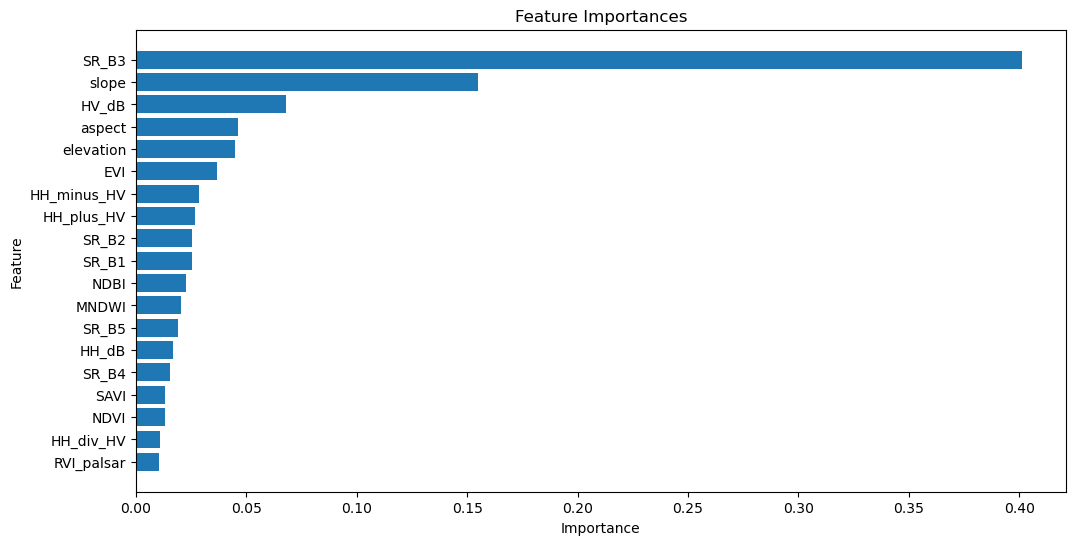

In [66]:
import matplotlib.pyplot as plt
# Obtener la importancia de las características
feature_importances = rf.feature_importances_

# Crear un DataFrame para organizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Mostrar las importancias de las características
print(feature_importances_df)

# Graficar las importancias de las características
plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [76]:
feature_names_reduced = ['EVI', 'HH_dB', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5',  'aspect', 'elevation', 'slope']



# this function also works with the ensemble.ExtraTrees estimator
trees = ml.rf_to_strings(rf, feature_names_reduced,output_mode='regression')

In [20]:
# create a ee classifier to use with ee objects from the trees
ee_classifier = ml.strings_to_classifier(trees)
# ee_classifier.getInfo()

In [77]:
user_id = 'users/facuboladerasgee'
# specify asset id where to save trees
# be sure to change  to your ee user name
asset_id = user_id + "/Rf_Completo"
asset_id
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

In [87]:
def export_model_in_parts(model, feature_names, user_id, base_asset_id, part_size=11):
    trees = ml.rf_to_strings(model, feature_names_reduced, output_mode='regression')
    total_trees = len(trees)
    
    # Dividir los árboles en partes
    for i in range(0, total_trees, part_size):
        part_trees = trees[i:i+part_size]
        part_asset_id = f"{base_asset_id}_part_{i//part_size}"
        
        # Exportar la parte
        ml.export_trees_to_fc(part_trees, part_asset_id)
        print(f"Parte {i//part_size} exportada a {part_asset_id}")

# Ejemplo de uso:
user_id = 'users/facuboladerasgee'
base_asset_id = f"{user_id}/Rf_chm-costa-uru"
export_model_in_parts(rf, feature_names_reduced, user_id, base_asset_id)

Parte 0 exportada a users/facuboladerasgee/Rf_chm-costa-uru_part_0
Parte 1 exportada a users/facuboladerasgee/Rf_chm-costa-uru_part_1
Parte 2 exportada a users/facuboladerasgee/Rf_chm-costa-uru_part_2
Parte 3 exportada a users/facuboladerasgee/Rf_chm-costa-uru_part_3
Parte 4 exportada a users/facuboladerasgee/Rf_chm-costa-uru_part_4
Parte 5 exportada a users/facuboladerasgee/Rf_chm-costa-uru_part_5
Parte 6 exportada a users/facuboladerasgee/Rf_chm-costa-uru_part_6
Parte 7 exportada a users/facuboladerasgee/Rf_chm-costa-uru_part_7
Parte 8 exportada a users/facuboladerasgee/Rf_chm-costa-uru_part_8
Parte 9 exportada a users/facuboladerasgee/Rf_chm-costa-uru_part_9


In [ ]:
# # Exporta la imagen a Google Cloud Storage
# task = ee.batch.Export.image.toCloudStorage(
#     image=image,
#     description='Sentinel-2_export',
#     bucket='your_bucket_name',  # Reemplaza con el nombre de tu bucket
#     fileNamePrefix='sentinel-2_export',
#     scale=30,
#     region=region,
#     maxPixels=1e13  # Ajusta el límite de píxeles si es necesario
# )

# # Inicia la tarea de exportación
# task.start()

# print('Export task started. Check the GCS bucket for the exported files.')